<a href="https://colab.research.google.com/github/AndreCauper/An-lise-de-dados-Airbnb-/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa*
 <center><img src="https://www.civitatis.com/f/portugal/lisboa/big/lisboa-card.jpg" height="350px"> </center>

O [Airbnb](https://www.airbnb.com.br/) é uma plataforma online que facilita a hospedagem entre pessoas que têm espaço extra em suas casas ou propriedades e viajantes que procuram acomodações temporárias. A ideia principal por trás do Airbnb é permitir que as pessoas aluguem seus espaços não utilizados, como quartos, apartamentos inteiros, casas ou até mesmo acomodações únicas, como casas na árvore ou barcos, para viajantes em busca de opções mais personalizadas e autênticas do que os hotéis tradicionais.

O Airbnb tornou-se extremamente popular e está presente em todo o mundo, oferecendo uma variedade de opções de hospedagem para diferentes orçamentos e preferências. O modelo de negócios do Airbnb transformou a indústria de hospedagem, proporcionando uma alternativa única para quem procura uma experiência mais personalizada e local durante suas viagens.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade LISBOA, e ver quais insights podem ser extraídos a partir de dados brutos.**




## Conhecendo um pouco de Lisboa
Lisboa é considerada como cidade global devido à sua importância em termos financeiros, comerciais, mediáticos, artísticos, educacionais e turísticos. É um importante centro económico do continente europeu, graças a um progresso financeiro crescente favorecido pelo maior porto de contentores da costa atlântica da Europa[4] e mais recentemente pelo Aeroporto Humberto Delgado, que recebe mais de 20 milhões de passageiros anualmente (2015). Lisboa conta com uma rede de autoestradas e um sistema de ferrovias de alta velocidade (Alfa Pendular), que liga as principais cidades portuguesas à capital. A cidade é a sétima mais visitada do sul da Europa, depois de Istambul, Roma, Barcelona, Madrid, Atenas e Milão, com 1 740 000 de turistas em 2009, tendo em 2014 ultrapassado a marca dos 3,35 milhões. A nível global, Lisboa foi a 35.ª cidade com maior destino turístico em 2015, cerca de 4 milhões de visitantes. Em 2015, foi considerada a 11.ª cidade turística mais popular, à frente de Madrid, Rio de Janeiro, Berlim e Barcelona. Em 2018 conquistou nos World Travel Awards os galardões de “Melhor Cidade Destino” e “Melhor Destino City Break” a nível mundial.

As distâncias não chegam a ser um grande problema na capital portuguesa. Além de não ser tão extensa territorialmente, a cidade é bem conectada com linhas de metrô, ônibus e também bondinhos elétricos — aqueles amarelinhos que estampam os cartões postais do destino.

A Capital de Portugal tem uma área urbana de 100,05 km² e em 2021 tinha 545 796 habitantes.

Recentemente, o Airbnb anunciou a implementação de um novo protocolo de anúncios em Portugal, facilitando para os anfitriões o cumprimento das leis aplicáveis aos aluguéis de curta duração.
 <center> <image src="https://i.pinimg.com/originals/e5/76/62/e576623f9f4d9d347a733e9c82969317.png"> </center>

## Obtenção dos Dados
Todos os dados foram obritdos apartir do site http://insideairbnb.com/get-the-data.html

Para esta análise inicial, será baixado apenas o arquivo:
* linsting.csv - *Summary information and metrics for listings in Lisboa (good for visualisations).*

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('airbnb_Lisboa.csv')


## Análise dos Dados
Para compreender um pouco da questão de hospedagem na plataforma do airbnb em Lisboa, é necessário uma visão geral dos dados

In [3]:
#tamanho do dataset
df.info()
print('\n quantidade de registros :',df.shape[0])
print(' número de variáveis :',df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22751 entries, 0 to 22750
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22751 non-null  int64  
 1   name                            22751 non-null  object 
 2   host_id                         22751 non-null  int64  
 3   host_name                       22751 non-null  object 
 4   neighbourhood_group             22751 non-null  object 
 5   neighbourhood                   22751 non-null  object 
 6   latitude                        22751 non-null  float64
 7   longitude                       22751 non-null  float64
 8   room_type                       22751 non-null  object 
 9   price                           21590 non-null  float64
 10  minimum_nights                  22751 non-null  int64  
 11  number_of_reviews               22751 non-null  int64  
 12  last_review                     

**Dicionário das variáveis**

* id = código gerado para identificar o imóvel
* name = nome da propriedade anunciada
* host_id = codigo gerado para identificar o anfitrião
* host_name = nome do anfitrião
* neighbourhood_group = regiao
* neighbourhood = nome do bairro
* latitude = coordenada latitude da propriedade
* longitude = coordenada longitude da propriedade
* room_type = informa os tipos de cômodos
* price = preço para alugar imóvel ou cômodo
* minimum_nights = minimo de noites para reservar
* number_of_reviews = quantidade de avaliaçoes que a propriedade possui
* last_reviews = data da ultima avaliação
* reviews_per_month =  quantidade de avaliação por mês
* calculated_host_listings_count = quantidade de imovel do mesmo anfitrião
* avaliability_365 = numero de dias disponíveiis dentro de 365 dias
* number_of_reviews_ltm = quantidade de avaliações no ultimo mes
* license =  registro da propriedade local para alugeis de curto prazo


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [16]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Rental unit in Lisbon · ★4.49 · 1 bedroom · 3 ...,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,68.0,3,63,2023-09-27,0.56,1,283,16,NaN
1,25659,Rental unit in Lisboa · ★4.82 · 1 bedroom · 1 ...,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,71.0,2,199,2023-11-13,1.69,1,333,24,56539/AL.
2,199461,Rental unit in Lisboa · ★4.92 · 2 bedrooms · 3...,914126,Martin,Lisboa,Santa Maria Maior,38.71095,-9.13673,Entire home/apt,199.0,1,195,2023-11-05,1.34,16,275,41,114187/AL
3,29248,Rental unit in Lisbon · ★4.57 · 1 bedroom · 2 ...,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,105.0,5,372,2023-07-15,2.36,5,129,19,23535/AL
4,208683,Rental unit in Lisbon · ★4.68 · 2 bedrooms · 2...,753902,Bruno,Lisboa,Santa Maria Maior,38.71052,-9.13365,Entire home/apt,60.0,3,124,2022-12-02,0.98,6,108,0,35037/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset é uma versão resumida que é disponibilizada no próprio site do airbnb

In [5]:
# identificar o volume de dados do DataFrame
print('quantidade de registro do dataset : ', df.shape[0])
print('quantidade de variaveis do dataset :',df.shape[1])

# verificar as 5 primeiras entradas do dataset
display(df.info())

quantidade de registro do dataset :  22751
quantidade de variaveis do dataset : 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22751 entries, 0 to 22750
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22751 non-null  int64  
 1   name                            22751 non-null  object 
 2   host_id                         22751 non-null  int64  
 3   host_name                       22751 non-null  object 
 4   neighbourhood_group             22751 non-null  object 
 5   neighbourhood                   22751 non-null  object 
 6   latitude                        22751 non-null  float64
 7   longitude                       22751 non-null  float64
 8   room_type                       22751 non-null  object 
 9   price                           21590 non-null  float64
 10  minimum_nights                  22751 non-null  int64  
 11  number_of_

None

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no inicio se esses valores nulos são significativos comparados ao total de entradas
* é possível ver que a coluna 'last_review' e 'reviews_per_month' possuem quase 13% dos valores faltantes
* A variável 'price' está com um pouco mais de 5% dos dados faltantes
* A variável 'license' está um pouco mais de 6% dos dados faltantes

In [29]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes.
(df.isnull().sum()/df.shape[0] * 100).sort_values(ascending=False)

last_review                       12.979649
reviews_per_month                 12.979649
license                            6.140389
price                              5.103072
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
name                               0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
host_name                          0.000000
host_id                            0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

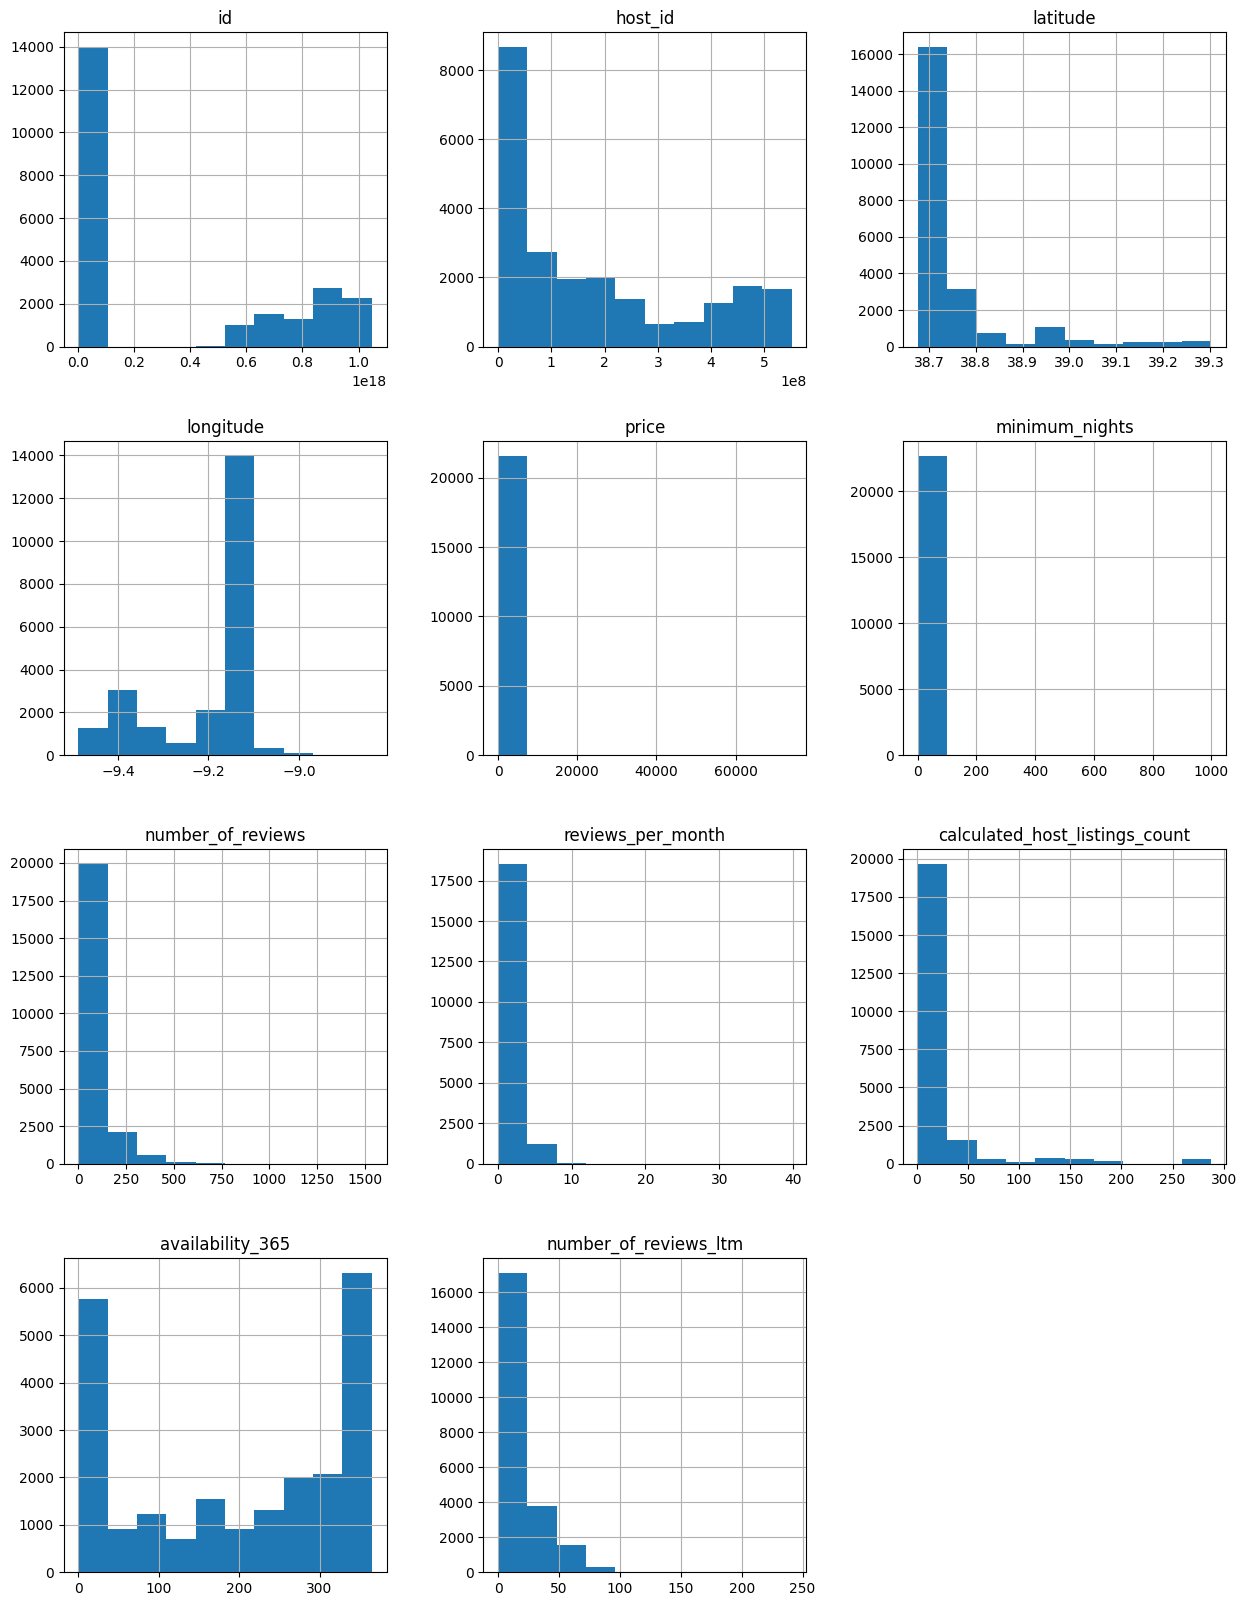

In [34]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10,figsize=(15,20));


## Há outliers presentes?

Podemos ver que esse dataset possui outliers. precisamos tratar destes valores, mas antes devemos entender os dados que estão faltando e o que eles carregam de significado.
* A variável last_review mostra a data que foram feitas as ultimas avaliações
* A variável reviews_per_month indica a quantidade média de avaliações por mês
* A variável license indica que a propriedade está regular junto ao governo local


## variável last_review
A variável last_review não carrega uma informação útil nesta análise. informa apenas quando foi a ultima avaliação feita do imóvel pelos usuários

In [4]:
#ver a variável last_review
df.last_review

0        2023-09-27
1        2023-11-13
2        2023-11-05
3        2023-07-15
4        2022-12-02
            ...    
22746           NaN
22747           NaN
22748           NaN
22749           NaN
22750           NaN
Name: last_review, Length: 22751, dtype: object

## variável reviews_per_month
A variável reviews_per_month diz a quantidade de vezes que o imóvel recebeu uma avaliação sem regisitrar as datas das avaliações anteriores

In [6]:
#ver a média variável reviews_per_month
print('media de reviews por mes',df.reviews_per_month.mean())

#ver a mediana da variável reviews_per_month
print('media de reviews por mes',df.reviews_per_month.median())


media de reviews por mes 1.5224381250631376
media de reviews por mes 1.065


## variável license
A variável license mostra se o imóvel está regular para serviço de hotelaria. informando inclusive se o imóvel é isento do registro

In [10]:
#ver a variável license
df.license.value_counts()

Exempt        3254
14829/AL        50
0/AL            35
55201/AL        31
88579/AL        29
              ... 
82688/AL         1
94048/AL         1
56660/AL         1
36473/2018       1
3624/AL          1
Name: license, Length: 13245, dtype: int64

In [21]:
#df.groupby(['license']).price.mean().sort_values(ascending=False)

license
810             8500.000000
103987/AL       8000.000000
96691/AL        6416.666667
124192/AL       5757.000000
78449/AL        5294.000000
                   ...     
AL 39587                NaN
AL/40879                NaN
AL/99077                NaN
M36HSJ8UGYEN            NaN
RNT-49554/AL            NaN
Name: price, Length: 13245, dtype: float64

In [35]:
#resumo estatístico
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.275100e+04,2.275100e+04,22751.000000,22751.000000,21590.000000,22751.000000,22751.000000,19798.000000,22751.000000,22751.000000,22751.000000
mean,3.214074e+17,1.764003e+08,38.762083,-9.208175,134.308893,4.453299,60.371720,1.522438,18.719661,195.019604,15.467716
std,4.152084e+17,1.765189e+08,0.112169,0.112812,586.582239,18.013646,92.844842,1.496262,43.269288,140.514310,19.800169
min,6.499000e+03,1.405900e+04,38.676140,-9.488100,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.092871e+07,2.120087e+07,38.711030,-9.291569,59.000000,1.000000,3.000000,0.430000,1.000000,34.000000,1.000000
50%,4.285647e+07,1.094943e+08,38.719080,-9.147670,86.000000,2.000000,22.000000,1.065000,4.000000,230.000000,7.000000
75%,7.837875e+17,3.032899e+08,38.747326,-9.134860,134.000000,3.000000,76.000000,2.210000,14.000000,336.000000,24.000000
max,1.047514e+18,5.509970e+08,39.303860,-8.838504,74110.000000,1000.000000,1537.000000,39.820000,288.000000,365.000000,241.000000


### retirar valores discrepantes, remover variaveis que não possuem muito poder preditivo e completar linhas que possui valores nulos para que se possa ter base de dados de qualidade



In [26]:
#definido limite para variavel price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variavel price', IQR_price)

#definindo limites superior e inferior para os valores da variavel price
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('limite superior : ', sup_price)
print('limite inferior : ', inf_price)

IQR da variavel price 75.0
limite superior :  246.5
limite inferior :  -53.5


In [27]:
#definindo limite para variavel minimum_nights
q1_mini_nights = df.minimum_nights.quantile(.25)
q3_mini_nights = df.minimum_nights.quantile(.75)
IQR_nights = q3_mini_nights - q1_mini_nights
print('IQR da variável minimum_nights : ', IQR_nights)

#definindo limites superior e inferior dos valores da variavel minimum_nights
sup_nights = q3_mini_nights + 1.5 * IQR_nights
inf_nights = q1_mini_nights - 1.5 * IQR_nights
print('limite superior da variavel minimum_nights : ', sup_nights)
print('limite inferior da variavel minimum_nights: ',inf_nights)

IQR da variável minimum_nights :  2.0
limite superior da variavel minimum_nights :  6.0
limite inferior da variavel minimum_nights:  -2.0


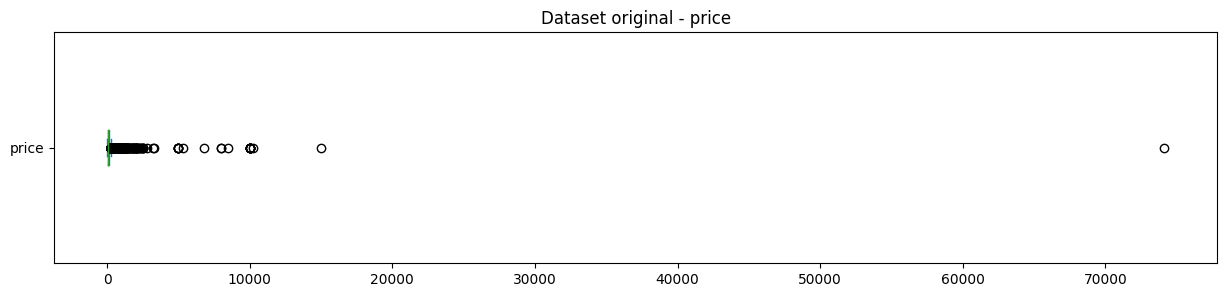

o Dataset possuit 18  variaveis
1499 Entradas  acima de 265.5
Representam 6.59% do dataset


In [25]:
#verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False)
ax.set_title('Dataset original - price')
plt.show()
print('o Dataset original possuit {}  variaveis' .format(df.shape[1]))
print('{} Entradas  acima de 265.5'. format(len(df[df.price > 265.5])))
print('Representam {:.2f}% do dataset'.format((len(df[df.price>265.5]) / df.shape[0]) * 100 ))

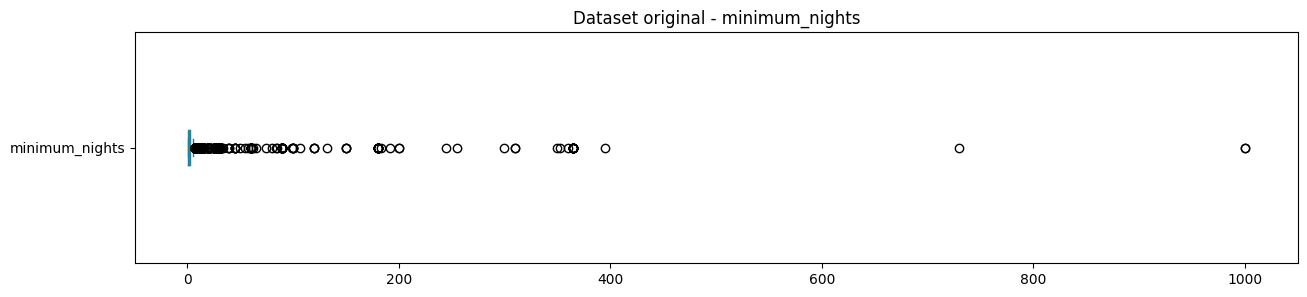

o Dataset original possuit  18  variaveis
1735 Entradas  acima de 6 
Representam 7.63% do dataset


In [9]:
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False)
ax.set_title('Dataset original - minimum_nights')
plt.show()
print('o Dataset original possuit  {}  variaveis' .format(df.shape[1]))
print('{} Entradas  acima de 6 '. format(len(df[df.minimum_nights > 6])))
print('Representam {:.2f}% do dataset'.format((len(df[df.minimum_nights>6]) / df.shape[0]) * 100 ))

## Limpeza de dados
Para melhor visualização dos dados, precisamo fazer uma limpeza dos valores que estâo fora da faixa medidos pelo IQR Score da variável 'price' e 'minimum_nights 'que é ideal para análise deste tipo

In [11]:
#limpeza do dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 265.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace = True)

print('antes da limpeza:', df.shape)
print('depois da limpeza: ', df_clean.shape)

antes da limpeza: (22751, 18)
depois da limpeza:  (19654, 18)


<Axes: >

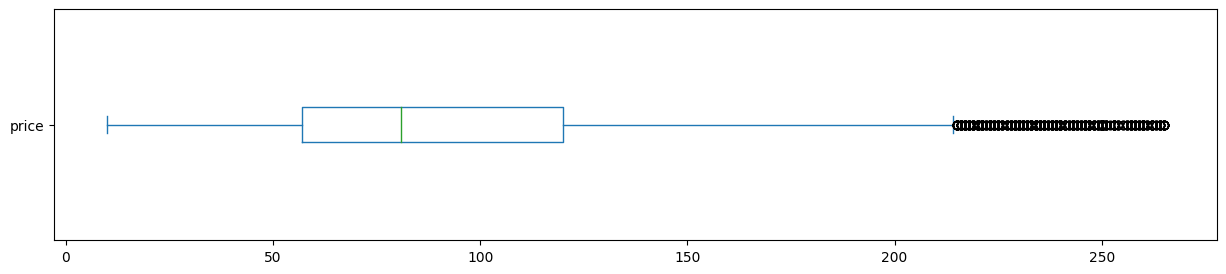

In [28]:
#visualizando dataset limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False)

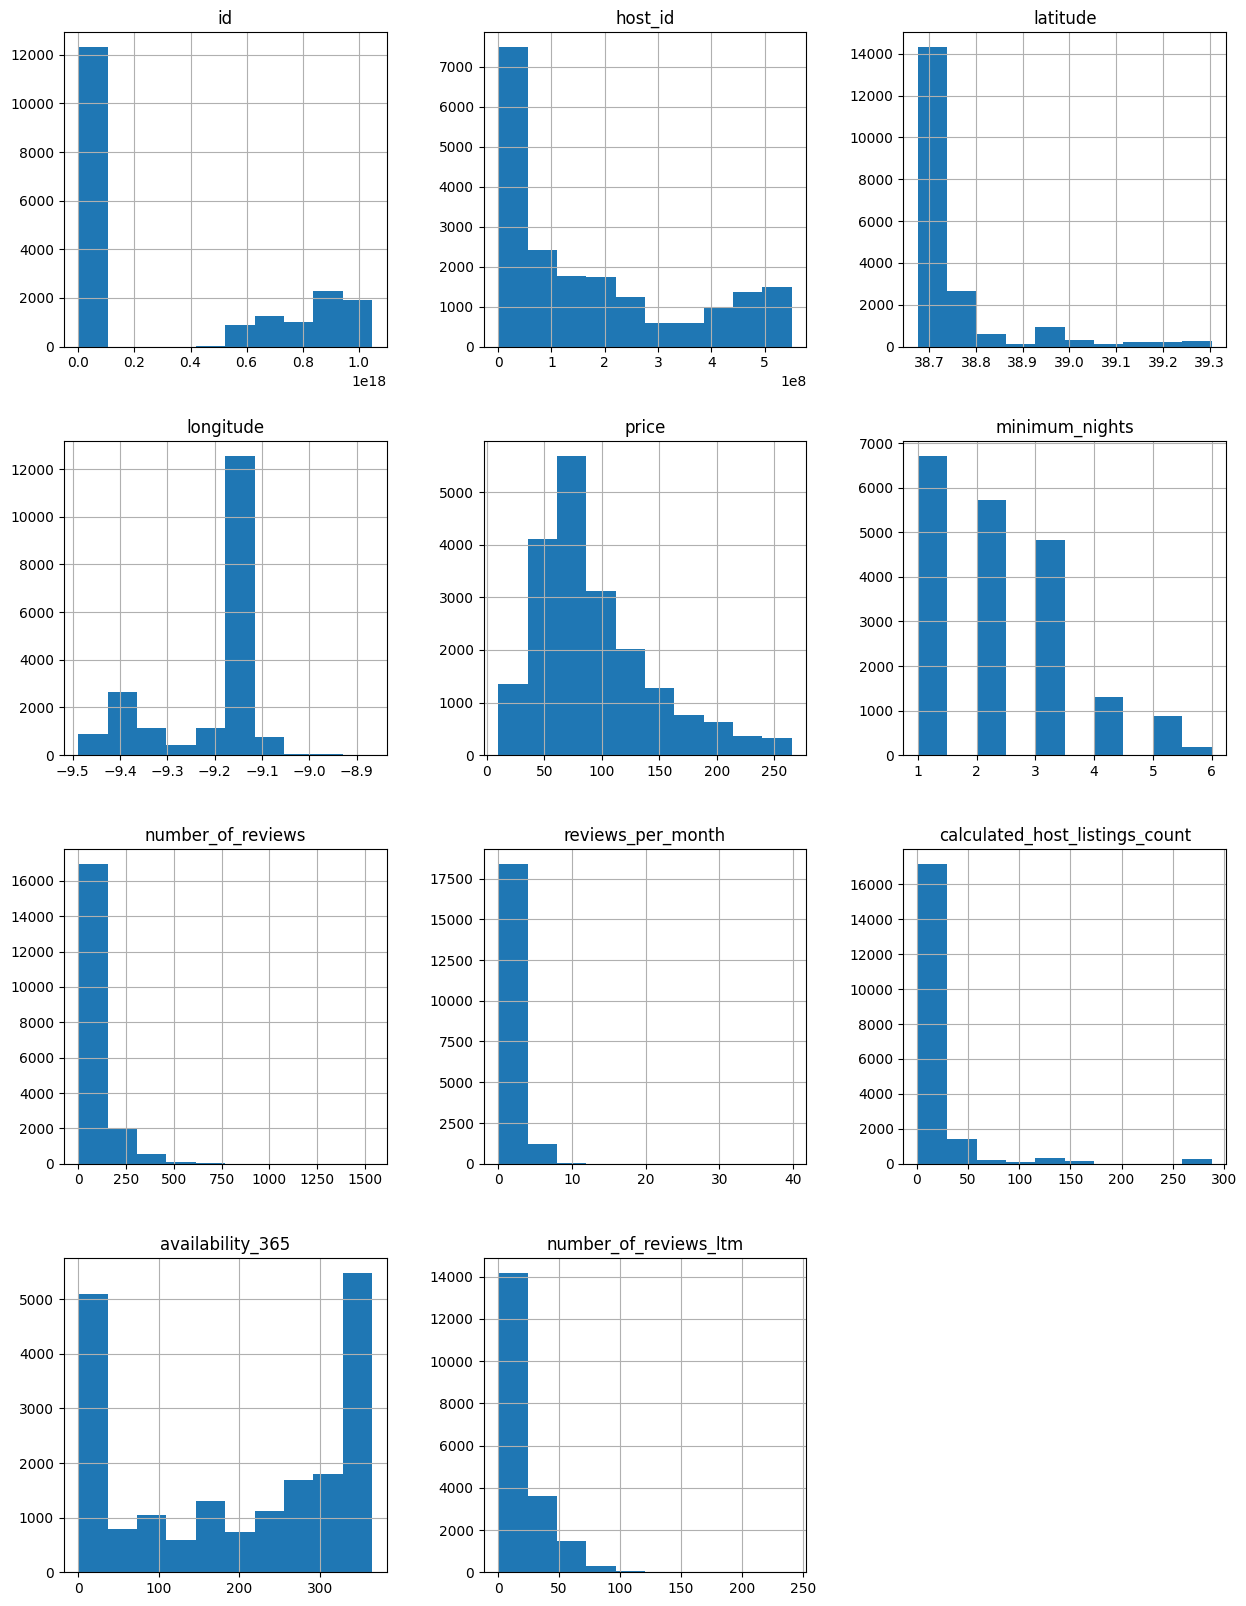

In [38]:
#histogramas com dataset já feito a limpeza
df_clean.hist(bins=10,figsize=(15,20));

## tratamos os outliers do dataset em funcao das variaveis price e minimum_nights. precisamos ainda completar o dataset com os valores ausentes.
* A variavel price será preenchida com a mediana dos preços.
* A variavel last_review será excluída do dataset devido a não relevância na análise a ser feita.
* A variável reviews_per_month será preenchida com valor da mediana para diminuir impprecisôes
* A variável license será excluída por ter dados do tipo string que não será levada em consideração na análise.


In [29]:
#visualizar dados nulos do dataset limpo
df_clean.isnull().sum().sort_values(ascending = False)

last_review                       1962
reviews_per_month                 1962
license                           1119
price                             1036
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
name                                 0
minimum_nights                       0
number_of_reviews                    0
host_name                            0
host_id                              0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
id                                   0
dtype: int64

In [12]:
#preenchendo variaivel price com a mediana dos preços
price_media = df_clean.price.median()
df_clean = df_clean.fillna({'price':price_media})

In [13]:
#drop da coluna last_review
df_clean.drop(columns=['last_review'], inplace=True)

In [16]:

#drop da coluna license
df_clean.drop(columns=['license'], inplace= True)

In [14]:
#drop da colunas reviews_per_month
#df_clean.drop(columns=['reviews_per_month'], inplace= True)

#preenceher a coluna reviews_per_month
rv_media = df_clean.reviews_per_month.median()
df_clean = df_clean.fillna({'reviews_per_month': rv_media})

In [17]:
#novo dataset
df_clean.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Q4. Qual a média dos preços de aluguel?**

In [18]:
# ver a média da coluna `price``
print('media dos preços ',df_clean.price.mean())


media dos preços  93.41564058206981


### **Q5. Qual a correlação existente entre as variáveis**

In [19]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','reviews_per_month','latitude','longitude']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,reviews_per_month,latitude,longitude
price,1.000000,0.108266,-0.045626,0.014504,0.068596,-0.128838,0.030925,-0.064098
minimum_nights,0.108266,1.000000,0.022834,-0.157545,-0.107203,-0.126527,0.064027,-0.116603
number_of_reviews,-0.045626,0.022834,1.000000,-0.097262,-0.067616,0.577736,-0.180777,0.198309
calculated_host_listings_count,0.014504,-0.157545,-0.097262,1.000000,0.027116,-0.070948,-0.067444,0.097758
availability_365,0.068596,-0.107203,-0.067616,0.027116,1.000000,-0.042922,0.066588,-0.044877
reviews_per_month,-0.128838,-0.126527,0.577736,-0.070948,-0.042922,1.000000,-0.191291,0.198903
latitude,0.030925,0.064027,-0.180777,-0.067444,0.066588,-0.191291,1.000000,-0.374291
longitude,-0.064098,-0.116603,0.198309,0.097758,-0.044877,0.198903,-0.374291,1.000000


<Axes: >

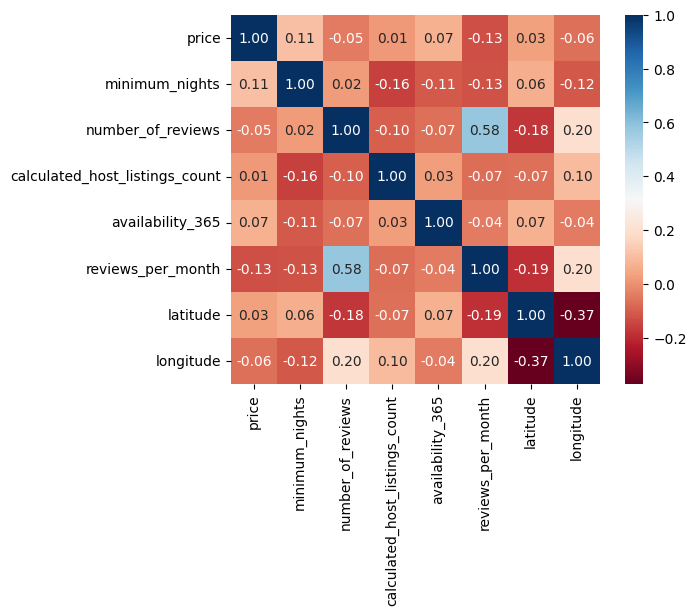

In [20]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu',fmt='.2f',square=True, linecolor='white',annot=True)


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14287
Private room        4934
Shared room          267
Hotel room           166
Name: room_type, dtype: int64

In [92]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]


Entire home/apt    0.726926
Private room       0.251043
Shared room        0.013585
Hotel room         0.008446
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



In [37]:
# ver preços por bairros, na média
df_clean[df_clean['neighbourhood_group'] == 'Lisboa'].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Parque das Naes           119.174419
Misericrdia               102.150300
Santa Maria Maior         101.970657
Santo Antnio               98.877064
Carnide                    95.870968
Campo de Ourique           95.223022
So Domingos de Benfica     92.125000
Belm                       92.082437
So Vicente                 88.552142
Marvila                    87.116667
Name: price, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

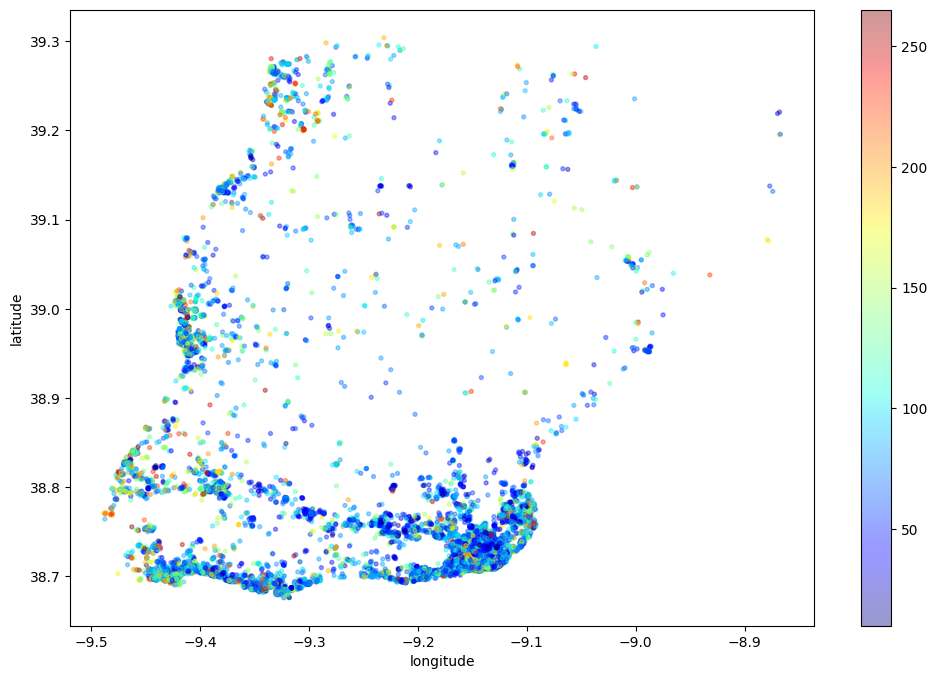

In [23]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'),figsize=(12,8))


In [24]:
# ver a média da coluna `minimum_nights``
print('preço medio por noite:',df_clean.groupby(['minimum_nights']).price.mean())

preço medio por noite: minimum_nights
1     86.678726
2     92.595704
3     99.889762
4    100.869632
5    102.280363
6     99.251309
Name: price, dtype: float64


## Conclusões


Foi feita apenas uma análise superfical na base de dados do Airbnb, porém já percebeu que existem alguns valores bem discrepantes dos dados gerais.

A variável 'license' chama atenção, por ser uma autorização por parte de um órgão responsávefiscalizador de aluguel de imóveis, para que houvesse uma relação de preço direta com a licença de aluguel do imóvel. A variável não será levada em conta por possuir campos nulos e impossíveis de serem analisados em em tipo numeral puro ou string pura

foi considerado nesta análise que o imóvel que tivesse mais avaliações tivesse relaçao direta com preço


Considerando um viés de que os imóveis mais avaliados tivessem relação com seus preços e os preços com a localização no mapa, a matriz de correlação mostrou que a variável 'number_of_reviews' não interfere diretamente na variável 'price' nem também as variáveis 'latitude' e 'longitude'.

Como era de se esperar, as hospedagens de maiores valores médios ficam na próximo do mar e na região central de lisboa conforme no heatmap é a região mais condensada, porém possui poucas hospedagens em maior valor absoluto.


Este dataset é uma versão bem resumida, ideal para abordagens didática e superficiais.

